## Kaggle Data Source:https://www.kaggle.com/datasets/neuromusic/avocado-prices

 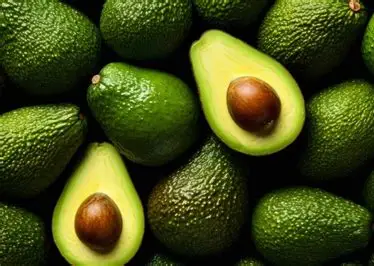

# importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#install
!pip install prophet

In [19]:
#importing facebook prophet
from prophet import Prophet

# TSF Case Study

In [2]:
#opening and loading file
avo=pd.read_csv("avocado.csv")

In [3]:
#show data
avo.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
#show shape
avo.shape

(18249, 14)

In [5]:
#show info
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
#check if there is null
avo.isnull().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


In [7]:
#sorting dates with changing in the original file
avo=avo.sort_values(by="Date")
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


# EDA


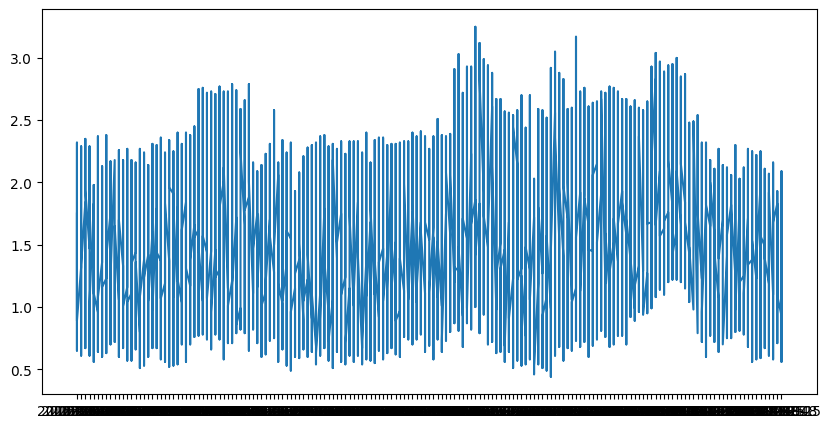

In [8]:
#plot of date and avg price
plt.figure(figsize=(10,5))
plt.plot(avo["Date"],avo["AveragePrice"])
plt.show()

In [9]:
#explore the frequency of each year
avo["year"]=pd.DatetimeIndex(avo["Date"]).year
avo["year"].value_counts()

,count
year,
2017,5722
2016,5616
2015,5615
2018,1296


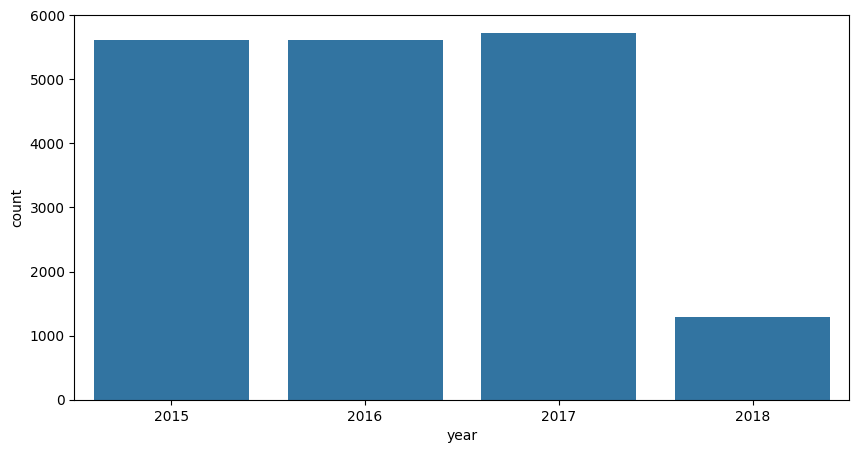

In [11]:
#make count plot of each year
plt.figure(figsize=(10,5))
sns.countplot(x="year",data=avo)
plt.show()

# pre-processing Data

In [12]:
#selct the important colomns
avo_prophet=avo[["Date","AveragePrice"]]
avo_prophet

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [27]:
#changing column names
avo_prophet.columns=["ds","y"]
avo_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [28]:
#making model fit
model=Prophet()
model.fit(avo_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuekw9xy_/_38tivtw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuekw9xy_/ee3zkjhg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14012', 'data', 'file=/tmp/tmpuekw9xy_/_38tivtw.json', 'init=/tmp/tmpuekw9xy_/ee3zkjhg.json', 'output', 'file=/tmp/tmpuekw9xy_/prophet_modelkantk3z9/prophet_model-20250727160044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:00:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:00:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
#give it to make extra 365 pins the prediction
future=model.make_future_dataframe(periods=365)
future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24


In [35]:
#get the last 5
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [32]:
#making forcast for the model
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.501458,0.897018,1.905207,1.501458,1.501458,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,-0.117841,0.0,0.0,0.0,1.383616
1,2015-01-11,1.496064,0.880236,1.841895,1.496064,1.496064,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,-0.109453,0.0,0.0,0.0,1.386612
2,2015-01-18,1.490671,0.879872,1.879894,1.490671,1.490671,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,-0.109033,0.0,0.0,0.0,1.381639
3,2015-01-25,1.485278,0.844899,1.803202,1.485278,1.485278,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,-0.127702,0.0,0.0,0.0,1.357576
4,2015-02-01,1.479885,0.851461,1.835516,1.479885,1.479885,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,-0.155584,0.0,0.0,0.0,1.324300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.157864,0.553886,1.573989,0.939228,1.326577,-0.086071,-0.086071,-0.086071,-0.086071,-0.086071,-0.086071,0.0,0.0,0.0,1.071793
530,2019-03-22,1.157120,0.506022,1.563157,0.937728,1.326245,-0.084296,-0.084296,-0.084296,-0.084296,-0.084296,-0.084296,0.0,0.0,0.0,1.072824
531,2019-03-23,1.156375,0.595644,1.596847,0.936245,1.325763,-0.082246,-0.082246,-0.082246,-0.082246,-0.082246,-0.082246,0.0,0.0,0.0,1.074129
532,2019-03-24,1.155630,0.539718,1.588516,0.934770,1.325656,-0.079940,-0.079940,-0.079940,-0.079940,-0.079940,-0.079940,0.0,0.0,0.0,1.075690


In [36]:
#extracting the vallues i want from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.383616,0.897018,1.905207
1,2015-01-11,1.386612,0.880236,1.841895
2,2015-01-18,1.381639,0.879872,1.879894
3,2015-01-25,1.357576,0.844899,1.803202
4,2015-02-01,1.324300,0.851461,1.835516
...,...,...,...,...
529,2019-03-21,1.071793,0.553886,1.573989
530,2019-03-22,1.072824,0.506022,1.563157
531,2019-03-23,1.074129,0.595644,1.596847
532,2019-03-24,1.075690,0.539718,1.588516


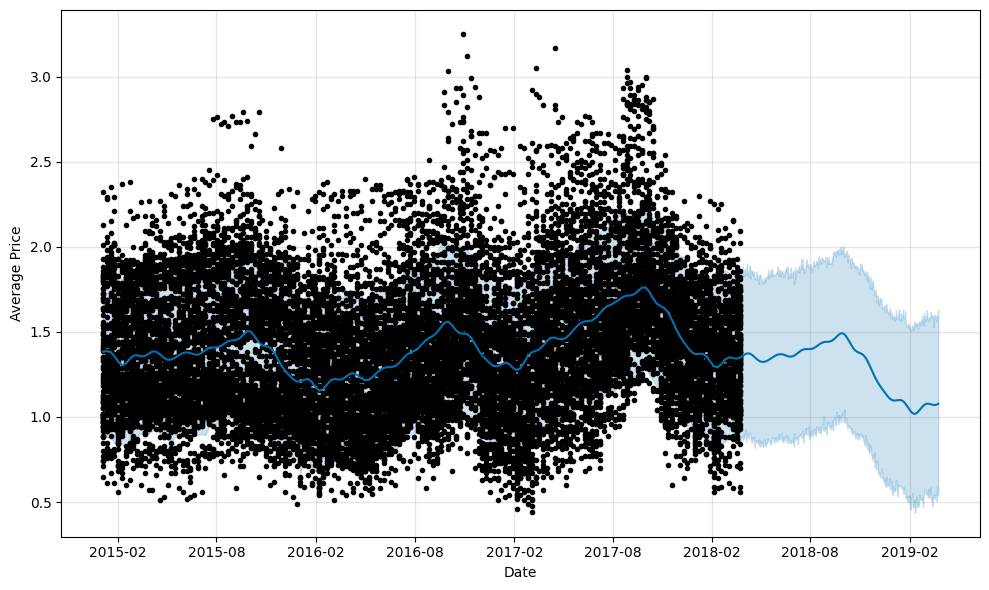

In [37]:
#plotting the forecast
fig_forecast=model.plot(forecast,xlabel='Date',ylabel='Average Price')

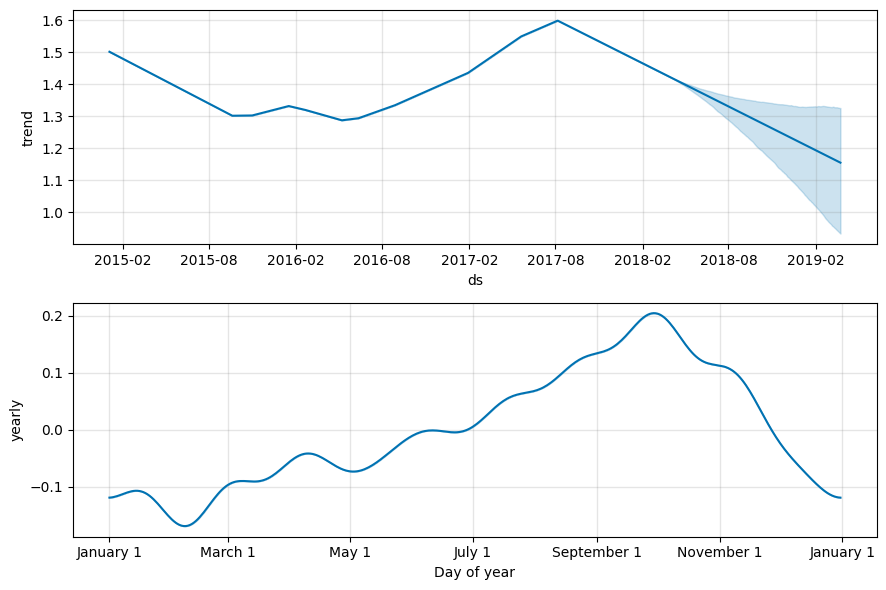

In [39]:
#the predictions i make to make descision on
fig_components=model.plot_components(forecast)